In [1]:
import hydrofunctions as hf
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("ticks")

In [2]:
ohio_samples = pd.read_csv(ZipFile('../../measurements/USGS stream data/MICHIGAN samples.zip').open(name='result.csv'))


/Users/imarkelo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (5,7,8,9,10,11,13,14,16,18,19,20,22,23,24,25,30,32,33,35,36,37,39,40,41,42,43,44,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
stations = pd.read_csv(ZipFile('../../measurements/USGS stream data/MICHIGAN stations.zip').open(name='station.csv'))

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (5,14,27,28,29,32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
location = (42.618881, -83.029573)

In [5]:
delta_xy = 1
r_stations = stations[(stations.LatitudeMeasure>location[0]-delta_xy) & (stations.LatitudeMeasure<location[0]+delta_xy) &
                     (stations.LongitudeMeasure>location[1]-delta_xy) & (stations.LongitudeMeasure<location[1]+delta_xy)]

In [26]:
csv_file_df = ohio_samples[ohio_samples.MonitoringLocationIdentifier.isin(r_stations.MonitoringLocationIdentifier.unique())]
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
# database = csv_file_df.ProviderName.unique()[0]
# csv_file_df['']
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
df = csv_file_df
df = csv_file_df[(csv_file_df['CharacteristicName']=="Chloride") & (csv_file_df['ResultSampleFractionText']=="Total") & (csv_file_df['ActivityStartDate'].dt.year>1995)]
df.shape              

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(2644, 63)

In [27]:
Show_IDS = [[st, False] for st in df.MonitoringLocationIdentifier.unique()] 

In [40]:
import folium
# import folium.plugins as plugins
from folium.plugins import MiniMap
from folium.plugins.beautify_icon import BeautifyIcon
from folium.features import DivIcon



# m = folium.Map(width=500,height=300, location=location, zoom_start=11.,tiles="OpenStreetMap", attr='Global Water Futures')
m = folium.Map(width=700,height=500, 
                location=location,
               control_scale = True,
                 zoom_start=12.5,
               zoom_control=False,
                 tiles='https://tile.thunderforest.com/outdoors/{z}/{x}/{y}.png?apikey=34dad269f6ab438c9534def56b86fa5f',
                 API_key='34dad269f6ab438c9534def56b86fa5f',
                attr='Global Water Futures')

# # show all
# for index, st_dic in enumerate(Show_IDS):
#     st = st_dic[0]
#     N = df[df.MonitoringLocationIdentifier==st].shape[0]
#     if N>0:
#         st_df = stations[stations.MonitoringLocationIdentifier == st]
#         folium.Marker(location=[st_df.LatitudeMeasure.values[0], 
#                                 st_df.LongitudeMeasure.values[0]], 
#                                   popup=folium.Popup(html=st_df.MonitoringLocationIdentifier.values[0] + '\n' + 'N:{}'.format(N),
#                                 show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='gray')
#                      ).add_to(m)



Show_IDS = [
["21MICH_WQX-820414", True],
["21MICH_WQX-820017", True],
# ["USGS-04165500", True],
]

ignore_indx = []

for index, st_dic in enumerate(Show_IDS):
    st = st_dic[0]
    print(st)
    if st_dic[1]:
        clr='#f44242'
    else:
        clr='#0b15c4'
    st_df = stations[stations.MonitoringLocationIdentifier == st]
    folium.CircleMarker(location=[st_df.LatitudeMeasure.values[0], 
                            st_df.LongitudeMeasure.values[0]], radius=23, 
                        fill=True, fill_color='white',
                            color = clr,fill_opacity=1,
                       weight=5).add_to(m)
    if not index in [i-1 for i in ignore_indx]:
        folium.map.Marker(
        location=[st_df.LatitudeMeasure.values[0]+0.0235,st_df.LongitudeMeasure.values[0]-0.1026], # 10 km
#         location=[st_df.LatitudeMeasure.values[0]+0.0135,st_df.LongitudeMeasure.values[0]-0.0526], # 5km
#         location=[st_df.LatitudeMeasure.values[0]+0.0065,st_df.LongitudeMeasure.values[0]-0.026], # 2km
#         location=[st_df.LatitudeMeasure.values[0]+0.0031,st_df.LongitudeMeasure.values[0]-0.013], # 1km
        icon=DivIcon(
            icon_size=(150,36),
            icon_anchor=(0,0),
            html='<div style="font-size: 24pt;text-align: center;vertical-align: middle">{}</div>'.format(index+1),
            )
        ).add_to(m)


m






21MICH_WQX-820414
21MICH_WQX-820017


In [41]:
selected_stations = [s[0] for s in Show_IDS]
# selected_stations = [
# "21OHIO_WQX-200572",
# "21OHIO_WQX-502520",
# "21OHIO_WQX-G02S14",
# "USGS-04212100",
# "USGS-04211820",
# "21OHIO_WQX-G02K52",
# "21OHIO_WQX-G02K54",
# "21OHIO_WQX-300187",
# "21OHIO_WQX-G01K08",
# "21OHIO_WQX-G01K07"]

In [42]:
WQP_name = "Chloride"


csv_file_df = ohio_samples[ohio_samples.MonitoringLocationIdentifier.isin(selected_stations)]
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
# database = csv_file_df.ProviderName.unique()[0]
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
sp = csv_file_df[(csv_file_df['CharacteristicName']==WQP_name) & (csv_file_df['ResultSampleFractionText']=="Total") & (csv_file_df['ActivityStartDate'].dt.year>1995) & (csv_file_df['ActivityStartDate'].dt.year<2019)]
# sp = sp[sp.ResultMeasureValue<0.5]
sp['ResultMeasureValue'] = pd.to_numeric(sp['ResultMeasureValue'])
sp.shape



/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


(109, 63)

In [43]:
# df_heideleberg = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Heidelberg/proc_data/TP_Maumee_River_Data.csv')

# df_heideleberg['Date'] =pd.to_datetime(df_heideleberg['Date'], errors='coerce')
# df_heideleberg['MonitoringLocationIdentifier'] = 'HTLP (NCWQR)'
# df_heideleberg['ActivityStartDate']=df_heideleberg['Date']
# df_heideleberg['ResultMeasureValue']=df_heideleberg['TP, mg/L as P']
# sp= sp.append(df_heideleberg)
# sp=sp.sort_values('MonitoringLocationIdentifier', ascending=False)
# sp['Station']=sp['MonitoringLocationIdentifier']
# sp.shape


In [44]:
pt = sns.color_palette("colorblind", len(selected_stations))

In [45]:
len(selected_stations)

2

In [46]:
sp['ResultMeasure/MeasureUnitCode'].unique()

array(['mg/l'], dtype=object)

In [47]:
river='Detroit_R'

In [48]:
# sp.loc[sp["ResultMeasureValue"]>100, "ResultMeasureValue"] = np.nan

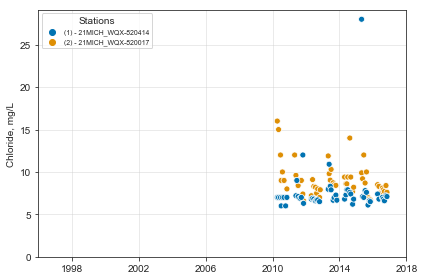

In [51]:
## fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
colors = ["windows blue", "greyish", "faded green", "dusty purple", "amber"]
ax = sns.scatterplot(x='ActivityStartDate', y='ResultMeasureValue', data=sp, hue_order=selected_stations, hue='MonitoringLocationIdentifier', palette=pt, markers=True)
leg = ["({}) - {}".format(i+1,st) for i, st in enumerate(selected_stations)]

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles[1:], leg, title='Stations', fontsize='x-small', loc='best')

# ax.legend(['(1) - HTLP (NCWQR)'], title='Stations', fontsize='x-small', loc=2)

plt.ylim(0,None)
plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Chloride, mg/L")
plt.xlabel("")
plt.tight_layout()
plt.savefig('Rivers/'+river+'/'+river+'_Cl.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/US/'+river+'/'+river+'_Cl_meas.pdf')



In [52]:
print(sp.groupby('MonitoringLocationIdentifier')["ResultMeasureValue"].describe().reindex(selected_stations).round(2).to_latex())


\begin{tabular}{lrrrrrrrr}
\toprule
{} &  count &  mean &   std &  min &   25\% &   50\% &  75\% &   max \\
MonitoringLocationIdentifier &        &       &       &      &       &       &      &       \\
\midrule
21MICH\_WQX-820414            &   53.0 &  7.60 &  3.03 &  6.0 &  6.70 &  7.00 &  7.4 &  28.0 \\
21MICH\_WQX-820017            &   56.0 &  8.99 &  1.95 &  6.6 &  7.85 &  8.55 &  9.4 &  16.0 \\
\bottomrule
\end{tabular}



In [53]:
selected_stations

['21MICH_WQX-820414', '21MICH_WQX-820017']

In [54]:
master_stations = [st[0] for st in Show_IDS if st[1]]
# master_stations = selected_stations
master_st_df = sp[sp.MonitoringLocationIdentifier.isin(master_stations)]
master_st_df['USGSPCode'] = 0
master_st_df.shape

(109, 63)

In [55]:
master_st_df.groupby('ActivityStartDate').mean().shape

(56, 6)

In [56]:
master_st_df[[
    'ActivityStartDate','USGSPCode', 'ResultMeasureValue']].groupby('ActivityStartDate').mean().reset_index().sort_values('ActivityStartDate').to_csv(
    'Rivers/'+river+'/Cl_'+river+'iver_data.csv', index=False)



### Discharge

In [35]:
# Finde station here:
# https://www.hydrocloud.org
site = '04165500'
start = '1996-01-01'
end = '2018-11-01'
response = hf.get_nwis(site, 'dv',start, end)
# response.get_data()
discharge = hf.extract_nwis_df(response.json())

In [36]:
discharge.columns

Index(['USGS:04165500:00060:00003', 'USGS:04165500:00060:00003_qualifiers'], dtype='object')

In [37]:
discharge['Flow, CFS']=discharge['USGS:'+site+':00060:00003']

In [38]:
discharge= discharge.reset_index()
discharge['Date']  = discharge['datetime']
discharge['Date'] =pd.to_datetime(discharge['Date'], errors='coerce')
discharge = discharge[['Date', 'Flow, CFS']]
discharge['Source'] = 'USGS-'+site

In [41]:
discharge[discharge.Source=='USGS-'+site][['Date', 'Flow, CFS']].dropna().to_csv('Rivers/'+river+'/Flow_'+river+'_CFS.csv', index=False)


In [38]:
# discharge = discharge.append(df_Q_heideleberg)

In [42]:
discharge['Discharge, cms'] = 0.028*discharge['Flow, CFS']

In [43]:
river

'Clinton_R'

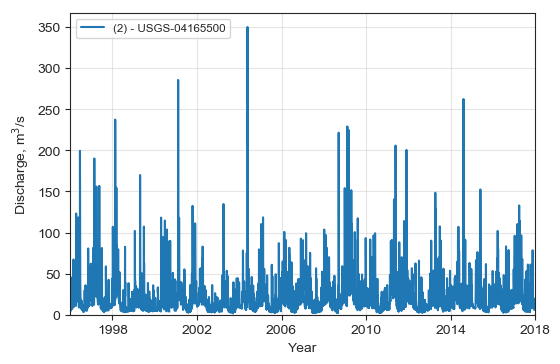

In [46]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
ax=sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source',ax=ax)

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes


ax.legend(['(2) - USGS-'+site], loc=2, fontsize='small')
ax.set_ylim(0,None)
ax.set_xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
ax.grid(alpha=0.5)
ax.set_ylabel("Discharge, m$^3$/s")
ax.set_xlabel("Year")

# axins = zoomed_inset_axes(ax, 8, loc='upper center')
# sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source', ax=axins,zorder=10)
# axins.set_xlim(datetime.datetime(2010,4,1), datetime.datetime(2010,6,1)) # apply the x-limits
# axins.set_ylim(0, 10) # apply the y-limits
# plt.yticks(visible=False)
# plt.xticks(visible=False)
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.savefig('Rivers/'+river+'/'+river+'_Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/US/'+river+'/'+river+'_Q.pdf')





In [47]:
discharge[['Date', 'Flow, CFS']].to_csv('Rivers/'+river+'/Flow_'+river+'_CFS.csv', index=False)

### EGRET Results

In [57]:
river

'Detroit_R'

In [58]:

EGRET_Daily = pd.read_csv('Rivers/'+river+'/EGRET Result/Cl/'+river+'iver_Cl_Daily.csv')
EGRET_Sample = pd.read_csv('Rivers/'+river+'/EGRET Result/Cl/'+river+'iver_Cl_Sample.csv')


In [59]:
EGRET_Sample['Fx_Hat'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcHat']/1000/1000
EGRET_Sample['Fx_C'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcAve']/1000/1000


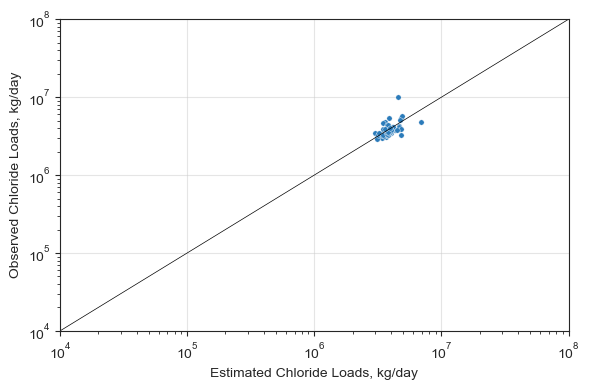

In [62]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
sns.scatterplot(y='Fx_C', 
                x='Fx_Hat',
                data=EGRET_Sample,
                s=15,
                linewidth=0.3, ax=ax,
               color=sns.color_palette("Blues")[4])
# plt.legend("")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot([-100,1000000000],[-100,1000000000], 'k', lw=0.5)
plt.xlim(10000,100000000)
plt.ylim(10000,100000000)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.xlabel("Estimated Chloride Loads, kg/day")
plt.ylabel("Observed Chloride Loads, kg/day")
# plt.xlabel("")
plt.tight_layout()
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/US/'+river+'/'+river+'_FvsF.pdf')


In [63]:
EGRET_Daily = EGRET_Daily.drop([4290])

In [64]:
EGRET_Daily['FluxYearMTA'] = EGRET_Daily['FluxDay']*365/1000
EGRET_Daily['Fx_SE'] = (np.exp(EGRET_Daily['SE']+EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000-np.exp(EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000)*365
EGRET_Daily_an = EGRET_Daily.groupby('waterYear').mean().reset_index()


In [65]:
EGRET_Daily_an

,waterYear,Unnamed: 0,Q,Julian,Month,Day,DecYear,MonthSeq,i,LogQ,Q7,Q30,yHat,SE,ConcDay,FluxDay,FNConc,FNFlux,FluxYearMTA,Fx_SE
0,2000,183.500000,5121.458472,54876.500000,6.513661,183.500000,2000.248889,1803.497268,183.500000,8.539225,5117.469545,5105.737929,2.305083,0.145702,10.301050,4.537682e+06,10.351018,4.721708e+06,1.656254e+06,264160.015598
1,2001,549.000000,5019.978384,55242.000000,6.526027,183.838356,2001.248374,1815.501370,549.000000,8.519904,5020.098396,5022.323997,2.287842,0.146033,10.119517,4.386834e+06,10.193290,4.651125e+06,1.601195e+06,257009.006894
2,2002,914.000000,5323.428858,55607.000000,6.526027,183.838356,2002.248288,1827.501370,914.000000,8.579181,5323.250257,5316.999987,2.281970,0.146412,10.049111,4.614478e+06,10.038105,4.580796e+06,1.684285e+06,270659.625511
3,2003,1279.000000,4956.833368,55972.000000,6.526027,183.838356,2003.248288,1839.501370,1279.000000,8.505830,4958.887602,4973.049483,2.256758,0.146719,9.784263,4.166993e+06,9.886397,4.512033e+06,1.520952e+06,243165.914163
4,2004,1644.500000,5186.172055,56337.500000,6.513661,183.500000,2004.248889,1851.497268,1644.500000,8.551688,5183.182278,5170.449144,2.250269,0.147178,9.718962,4.349771e+06,9.737575,4.443762e+06,1.587667e+06,256053.953928
5,2005,2010.000000,5243.132672,56703.000000,6.526027,183.838356,2005.248374,1863.501370,2010.000000,8.563314,5243.901798,5246.872909,2.236735,0.147647,9.581239,4.337133e+06,9.593011,4.379014e+06,1.583054e+06,256157.871593
6,2006,2375.000000,5130.225481,57068.000000,6.526027,183.838356,2006.248288,1875.501370,2375.000000,8.542154,5132.818361,5138.191306,2.219258,0.148125,9.410560,4.176613e+06,9.451133,4.314667e+06,1.524464e+06,248217.805128
7,2007,2740.000000,5034.580124,57433.000000,6.526027,183.838356,2007.248288,1887.501370,2740.000000,8.522352,5035.340158,5039.555158,2.202020,0.148620,9.238650,4.009898e+06,9.312615,4.251827e+06,1.463613e+06,237652.929342
8,2008,3105.500000,4994.712566,57798.500000,6.513661,183.500000,2008.248889,1899.497268,3105.500000,8.514302,4990.961986,4976.625853,2.188008,0.149175,9.102493,3.917138e+06,9.176973,4.189541e+06,1.429755e+06,232593.504178
9,2009,3471.000000,5435.440221,58164.000000,6.526027,183.838356,2009.248374,1911.501370,3471.000000,8.598178,5432.226835,5427.132026,2.186932,0.149837,9.094645,4.278681e+06,9.045205,4.130449e+06,1.561719e+06,256805.207091


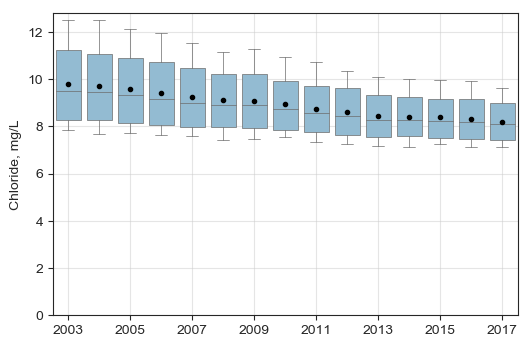

In [66]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

# sns.boxplot(EGRET_Daily['waterYear'], EGRET_Daily['ConcDay'], color=sns.color_palette()[0])

# plt.fill_between(EGRET_Daily_an['waterYear'][5:-1],
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]-EGRET_Daily_an['SE'][5:-1]),
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]+EGRET_Daily_an['SE'][5:-1]), 
#                  color=sns.color_palette()[0], alpha=0.15)
# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

meanpointprops = dict(marker='.', markeredgecolor='black', markersize=6,markerfacecolor='black')
ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", 
                 data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2],
                order=range(2003,2019))

# ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
# plt.xlim(2003,2018)
plt.xlim(-0.5, 14.5)
locs, labels = plt.xticks() 
plt.xticks(locs[::2], labels[::2])
plt.ylim(0,None)
# plt.vlines(4.5, 0, 0.6, 'k', '-.', lw=0.7)
# plt.vlines(9.5, 0, 0.6, 'k', '-.', lw=0.7)

# ax.set_xticks([int(x) for x in np.linspace(2003,2017, 8)])

plt.grid(alpha=0.5)
plt.ylabel("Chloride, mg/L")
plt.xlabel("")
# fig.autofmt_xdate()
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/US/'+river+'/'+river+'_Cl.pdf')




In [67]:
EGRET_Daily.groupby('waterYear').mean()

,Unnamed: 0,Q,Julian,Month,Day,DecYear,MonthSeq,i,LogQ,Q7,Q30,yHat,SE,ConcDay,FluxDay,FNConc,FNFlux,FluxYearMTA,Fx_SE
waterYear,,,,,,,,,,,,,,,,,,,
2000,183.500000,5121.458472,54876.500000,6.513661,183.500000,2000.248889,1803.497268,183.500000,8.539225,5117.469545,5105.737929,2.305083,0.145702,10.301050,4.537682e+06,10.351018,4.721708e+06,1.656254e+06,264160.015598
2001,549.000000,5019.978384,55242.000000,6.526027,183.838356,2001.248374,1815.501370,549.000000,8.519904,5020.098396,5022.323997,2.287842,0.146033,10.119517,4.386834e+06,10.193290,4.651125e+06,1.601195e+06,257009.006894
2002,914.000000,5323.428858,55607.000000,6.526027,183.838356,2002.248288,1827.501370,914.000000,8.579181,5323.250257,5316.999987,2.281970,0.146412,10.049111,4.614478e+06,10.038105,4.580796e+06,1.684285e+06,270659.625511
2003,1279.000000,4956.833368,55972.000000,6.526027,183.838356,2003.248288,1839.501370,1279.000000,8.505830,4958.887602,4973.049483,2.256758,0.146719,9.784263,4.166993e+06,9.886397,4.512033e+06,1.520952e+06,243165.914163
2004,1644.500000,5186.172055,56337.500000,6.513661,183.500000,2004.248889,1851.497268,1644.500000,8.551688,5183.182278,5170.449144,2.250269,0.147178,9.718962,4.349771e+06,9.737575,4.443762e+06,1.587667e+06,256053.953928
2005,2010.000000,5243.132672,56703.000000,6.526027,183.838356,2005.248374,1863.501370,2010.000000,8.563314,5243.901798,5246.872909,2.236735,0.147647,9.581239,4.337133e+06,9.593011,4.379014e+06,1.583054e+06,256157.871593
2006,2375.000000,5130.225481,57068.000000,6.526027,183.838356,2006.248288,1875.501370,2375.000000,8.542154,5132.818361,5138.191306,2.219258,0.148125,9.410560,4.176613e+06,9.451133,4.314667e+06,1.524464e+06,248217.805128
2007,2740.000000,5034.580124,57433.000000,6.526027,183.838356,2007.248288,1887.501370,2740.000000,8.522352,5035.340158,5039.555158,2.202020,0.148620,9.238650,4.009898e+06,9.312615,4.251827e+06,1.463613e+06,237652.929342
2008,3105.500000,4994.712566,57798.500000,6.513661,183.500000,2008.248889,1899.497268,3105.500000,8.514302,4990.961986,4976.625853,2.188008,0.149175,9.102493,3.917138e+06,9.176973,4.189541e+06,1.429755e+06,232593.504178


In [68]:
EGRET_Daily_an['Fx_AE'] = (abs(EGRET_Sample['Fx_Hat'] - EGRET_Sample['Fx_C'])/EGRET_Sample['Fx_C']).mean()*EGRET_Daily_an['FluxYearMTA']




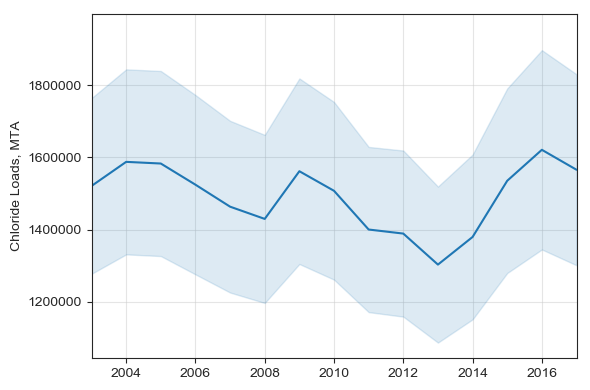

In [72]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

k=None
plt.plot(EGRET_Daily_an['waterYear'][:k], EGRET_Daily_an['FluxYearMTA'][:k], c=sns.color_palette()[0])

# s=12
# plt.plot(EGRET_Daily_an['waterYear'][s:], EGRET_Daily_an['FluxYearMTA'][s:], c=sns.color_palette()[0])

plt.fill_between(EGRET_Daily_an['waterYear'][:k],
                 EGRET_Daily_an['FluxYearMTA'][:k]-EGRET_Daily_an['Fx_SE'][:k],
                 EGRET_Daily_an['FluxYearMTA'][:k]+EGRET_Daily_an['Fx_SE'][:k], 
                 color=sns.color_palette()[0], alpha=0.15)

# plt.fill_between(EGRET_Daily_an['waterYear'][s:],
#                  EGRET_Daily_an['FluxYearMTA'][s:]-EGRET_Daily_an['Fx_SE'][s:],
#                  EGRET_Daily_an['FluxYearMTA'][s:]+EGRET_Daily_an['Fx_SE'][s:], 
#                  color=sns.color_palette()[0], alpha=0.15)



# plt.vlines(2007, 0, 200, 'k', '-.', lw=0.7)
# plt.vlines(2013, 0, 200, 'k', '-.', lw=0.7)


# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

# meanpointprops = dict(marker='D', markeredgecolor='black', markersize=1,markerfacecolor=sns.color_palette()[3])
# ax = sns.boxplot(linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="FluxYearMTA", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
plt.xlim(2003,2017)
# plt.xticks([int(x) for x in np.linspace(5,19,8)], [int(x) for x in np.linspace(2003,2017, 8)])
# plt.ylim(0,200)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Chloride Loads, MTA")
plt.xlabel("")
plt.tight_layout()
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/US/'+river+'/'+river+'_Cl_Flux.pdf')


In [70]:
print(EGRET_Daily_an[(EGRET_Daily_an.waterYear<2018) & (EGRET_Daily_an.waterYear>2002)][['waterYear', 'FluxYearMTA','Fx_SE']].round(1).T.to_latex(index=False))

\begin{tabular}{rrrrrrrrrrrrrrr}
\toprule
        3  &         4  &         5  &         6  &         7  &         8  &         9  &         10 &         11 &         12 &         13 &         14 &         15 &         16 &         17 \\
\midrule
    2003.0 &     2004.0 &     2005.0 &     2006.0 &     2007.0 &     2008.0 &     2009.0 &     2010.0 &     2011.0 &     2012.0 &     2013.0 &     2014.0 &     2015.0 &     2016.0 &     2017.0 \\
 1520952.3 &  1587666.6 &  1583053.7 &  1524463.6 &  1463612.7 &  1429755.3 &  1561718.5 &  1507551.6 &  1400364.9 &  1389153.7 &  1303304.7 &  1379748.1 &  1535337.9 &  1621029.5 &  1565826.2 \\
  243165.9 &   256054.0 &   256157.9 &   248217.8 &   237652.9 &   232593.5 &   256805.2 &   245903.5 &   228627.5 &   229880.2 &   215937.0 &   228034.6 &   255434.9 &   275844.2 &   264378.8 \\
\bottomrule
\end{tabular}



In [71]:
EGRET_Daily.groupby(['waterYear'])['FluxYearMTA'].describe()

,count,mean,std,min,25%,50%,75%,max
waterYear,,,,,,,,
2000,366.0,1.656254e+06,274977.517447,1.247107e+06,1.409985e+06,1.610260e+06,1.850983e+06,2.289643e+06
2001,365.0,1.601195e+06,291537.313713,1.184242e+06,1.345905e+06,1.537029e+06,1.822751e+06,2.322936e+06
2002,365.0,1.684285e+06,273588.243225,1.229904e+06,1.429169e+06,1.668600e+06,1.920211e+06,2.436899e+06
2003,365.0,1.520952e+06,216215.544951,1.162626e+06,1.353664e+06,1.459676e+06,1.666018e+06,2.141772e+06
2004,366.0,1.587667e+06,258293.095547,1.114497e+06,1.382401e+06,1.564716e+06,1.781740e+06,2.291781e+06
2005,365.0,1.583054e+06,250096.222184,1.075964e+06,1.372948e+06,1.535330e+06,1.773473e+06,2.218624e+06
2006,365.0,1.524464e+06,247856.656285,1.159547e+06,1.303110e+06,1.474343e+06,1.737210e+06,2.236825e+06
2007,365.0,1.463613e+06,200192.222901,1.076568e+06,1.285096e+06,1.433759e+06,1.630849e+06,1.992672e+06
2008,366.0,1.429755e+06,176628.289353,1.063121e+06,1.290971e+06,1.443321e+06,1.559558e+06,1.951543e+06
